In [99]:
from tqdm import tqdm
import torch

import matplotlib.pyplot as plt

from turboflow.models.core import MLP
import turboflow.utils.torch_utils as tch

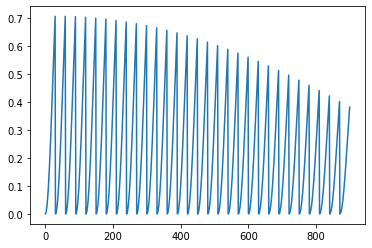

In [185]:
x = torch.linspace(0,1,30)
y = torch.linspace(0,1,30)

XY = torch.stack(torch.meshgrid([x,y])).permute([1,2,0]).view(-1,2)

def f(x,y):
    return torch.cos(x) * torch.sin(y)**2

F = f(XY[:,0],XY[:,1])
plt.plot(F)

In [186]:
mlp = MLP([2] + 2*[8] + [1], 'tanh')
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-5)
criterion = torch.nn.MSELoss()

In [ ]:
losses = []
for i in tqdm(range(5000)):
    F_hat = mlp(XY)

    loss = criterion(F_hat, F)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    
plt.plot(losses)

  0%|                                                                                          | 0/5000 [00:00<?, ?it/s]/home/dicarlo_d/Documents/Code/TurboSuperResultion/venv/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([900])) that is different to the input size (torch.Size([900, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 91%|██████████████████████████████████████████████████████████████████████▉       | 4548/5000 [00:13<00:01, 349.35it/s]

In [ ]:
XY.requires_grad_(True)
F_hat = mlp(XY)

print(F_hat)
print(F)

In [ ]:
df = tch.diff(F_hat, XY)
print(df)

In [ ]:
plt.plot(df[:,0].detach().numpy())
plt.plot(df[:,1].detach().numpy())

In [ ]:
plt.plot(F_hat.detach())
plt.plot(F.detach())